In [67]:
import os
os.chdir(r'C:\Users\63094\Downloads\hero wired\datacsv')
os.listdir()
import pandas as pd
df=pd.read_csv('Dataset.csv')

In [68]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


### firstly this is supervised learning model(labels are given)

### target variable is descrete

###  so this is a classification problem

### Unique Values

In [69]:
for i in df.columns:
    print("Unique of {}'s count is :{}".format(i,df[i].nunique()))

Unique of Churn's count is :2
Unique of AccountWeeks's count is :212
Unique of ContractRenewal's count is :2
Unique of DataPlan's count is :2
Unique of DataUsage's count is :174
Unique of CustServCalls's count is :10
Unique of DayMins's count is :1667
Unique of DayCalls's count is :119
Unique of MonthlyCharge's count is :627
Unique of OverageFee's count is :1024
Unique of RoamMins's count is :162


In [70]:
for i in df.columns:
    print(i,'-----',round((df[i].nunique()/df.shape[0])*100,3))

Churn ----- 0.06
AccountWeeks ----- 6.361
ContractRenewal ----- 0.06
DataPlan ----- 0.06
DataUsage ----- 5.221
CustServCalls ----- 0.3
DayMins ----- 50.015
DayCalls ----- 3.57
MonthlyCharge ----- 18.812
OverageFee ----- 30.723
RoamMins ----- 4.86


### Null Values

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


### DUPLICATES

In [72]:
df.duplicated().sum()

0

#  Data Analysis

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
df.shape

(3333, 11)

In [74]:
df.describe(percentiles=[0.25,0.35,0.75,0.85,0.90,0.95,0.99])

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
35%,0.000000,86.000000,1.000000,0.000000,0.000000,1.000000,157.920000,93.000000,48.000000,9.030000,9.300000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
85%,0.000000,142.000000,1.000000,1.000000,2.700000,3.000000,236.300000,121.000000,75.200000,12.710000,13.000000
90%,1.000000,152.000000,1.000000,1.000000,3.050000,3.000000,249.580000,126.000000,80.500000,13.290000,13.700000


In [75]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

In [76]:
df.head(10)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
5,0,118,0,0,0.00,0,223.4,98,57.0,11.03,6.3
6,0,121,1,1,2.03,3,218.2,88,87.3,17.43,7.5
7,0,147,0,0,0.00,0,157.0,79,36.0,5.16,7.1
8,0,117,1,0,0.19,1,184.5,97,63.9,17.58,8.7
9,0,141,0,1,3.02,0,258.6,84,93.2,11.10,11.2


### Outliers

In [77]:
import warnings
from warnings import filterwarnings
filterwarnings("ignore")

In [78]:
a=df['AccountWeeks'].quantile(0.25)
b=df['AccountWeeks'].quantile(0.75)

In [79]:
a,b

(74.0, 127.0)

In [80]:
iqr=b-a
iqr

53.0

In [81]:
ll=a-1.5*iqr
ul=b+1.5*iqr

In [82]:
ll,ul

(-5.5, 206.5)

### BOXPLOT

<AxesSubplot:xlabel='AccountWeeks'>

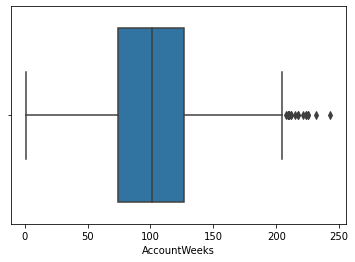

In [83]:
sns.boxplot(df['AccountWeeks'])

In [84]:
df['AccountWeeks']=np.where(df['AccountWeeks']>207,207,df['AccountWeeks'])

<AxesSubplot:xlabel='AccountWeeks'>

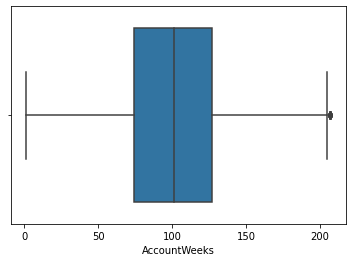

In [85]:
sns.boxplot(df['AccountWeeks'])

### we remove outliers in accountweeks

### analysis on variables

In [86]:
df.AccountWeeks.describe()

count    3333.000000
mean      101.006001
std        39.651316
min         1.000000
25%        74.000000
50%       101.000000
75%       127.000000
max       207.000000
Name: AccountWeeks, dtype: float64

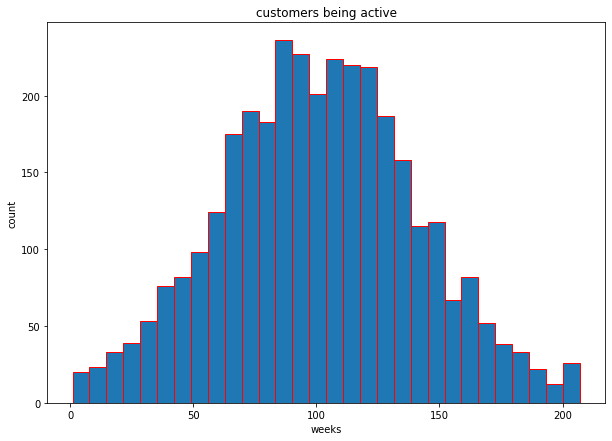

In [87]:
plt.figure(figsize=(10,7))
plt.hist(df['AccountWeeks'],edgecolor='red',bins=30)
plt.xlabel('weeks')
plt.ylabel('count')
plt.title('customers being active')
plt.show()

In [88]:
# Observation
## The maximum number of weeks that a customer being active is 243 weeks
## The minimum number of weeks that a customer being active is 1 week
## And the more number of weeks that the customers being active is in between 60 and 140 weeks

### PIE-PLOT

### ContractRenewal

In [89]:
r=df.ContractRenewal.value_counts(normalize=True)
r

1    0.90309
0    0.09691
Name: ContractRenewal, dtype: float64

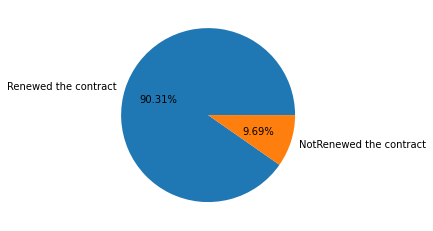

In [90]:
plt.pie(r,labels=['Renewed the contract','NotRenewed the contract'],autopct='%1.2f%%')
plt.show()

In [91]:
df.ContractRenewal.value_counts()
# Observation 
## Nearly 3000 customers have renewed the Contract
## and about 323 customers have not renewed the Contract# Observation 
 

1    3010
0     323
Name: ContractRenewal, dtype: int64

In [92]:
# Observation 
## Nearly 3000 customers have renewed the Contract
## and about 323 customers have not renewed the Contract

### dataplan

In [93]:
## 1->> Indicates that the customers has the plan on going 
## 0->> Indicates that the customers has no plan

In [94]:
df['DataPlan'].value_counts()

0    2411
1     922
Name: DataPlan, dtype: int64

<AxesSubplot:xlabel='DataPlan', ylabel='count'>

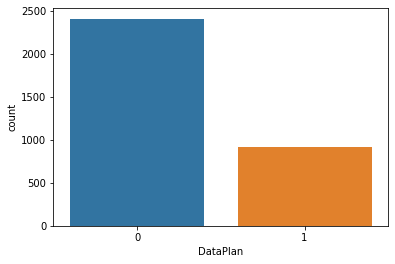

In [95]:
sns.countplot(df['DataPlan'])

### Data plan

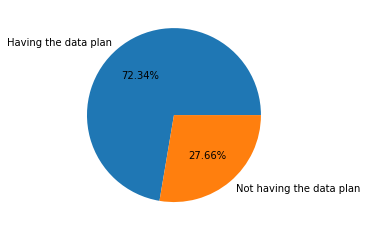

In [96]:
d=df.DataPlan.value_counts(normalize=True)
d
plt.pie(d,labels=['Having the data plan','Not having the data plan'],autopct='%1.2f%%')
plt.show()

In [97]:
# Observation 
## About 72 % has no plan
## About 28 % has plan

### num of customer service calls 

In [98]:
df.CustServCalls.value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: CustServCalls, dtype: int64

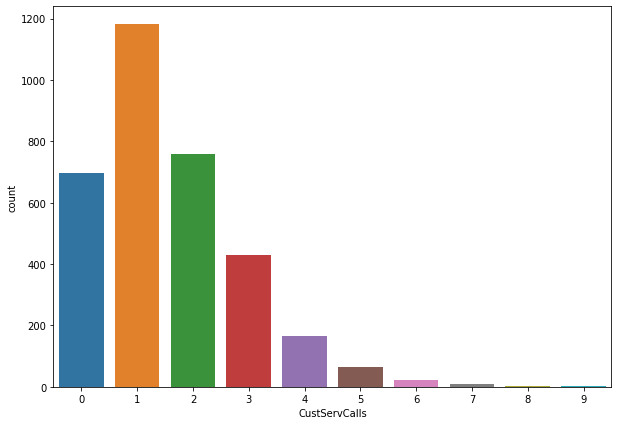

In [99]:
plt.figure(figsize=(10,7))
sns.countplot(data=df,x='CustServCalls');

In [100]:
# Observation
## The max number of calls to customer service is found to be 1 i.e, 1181
## followed by 2 calls which is of 759 times and so on

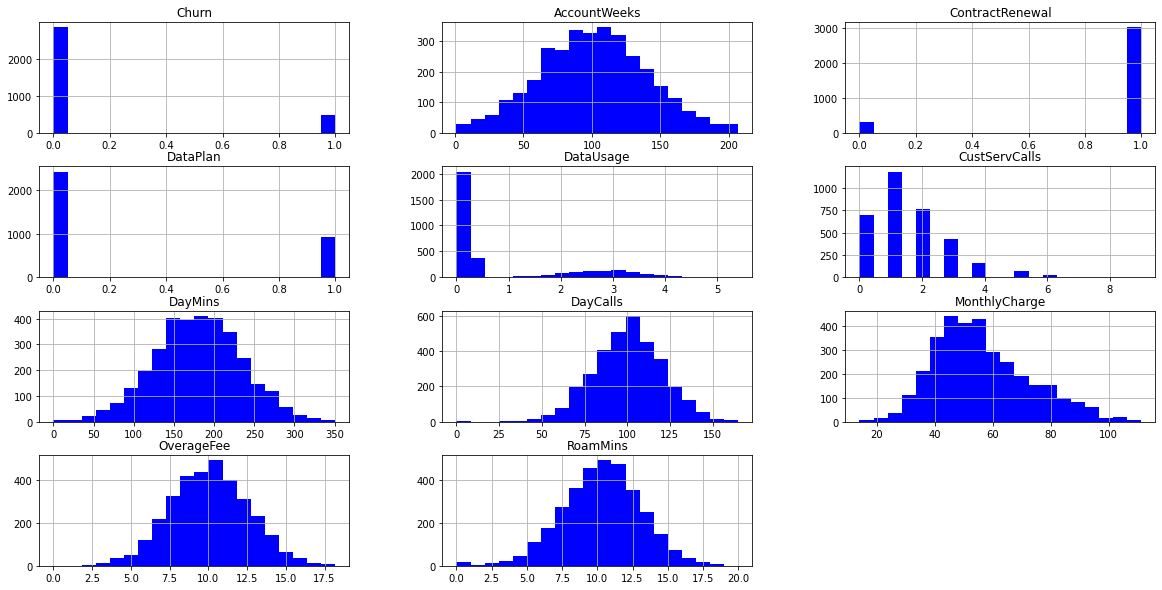

In [101]:
df.hist(bins = 20, figsize = (20,10), color = 'b');

### Target variable...

In [102]:
#### in this our target variable is churn

In [103]:
df.Churn.value_counts()

0    2850
1     483
Name: Churn, dtype: int64

In [104]:
c=df.Churn.value_counts()

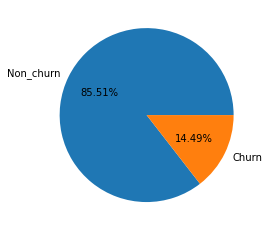

In [105]:
plt.pie(c,labels=['Non_churn','Churn'],autopct='%1.2f%%')
plt.show()

In [106]:
# Observation
## About 14% of the customers are have cancelled the Service
## And about 86% of the customers have not cancelled the Service

### Bivarient analysis 

<AxesSubplot:xlabel='DataPlan', ylabel='count'>

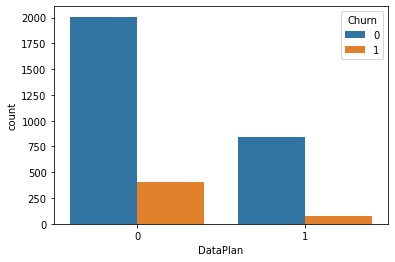

In [107]:
sns.countplot(x=df['DataPlan'],hue=df['Churn'],data=df)

<AxesSubplot:xlabel='ContractRenewal', ylabel='count'>

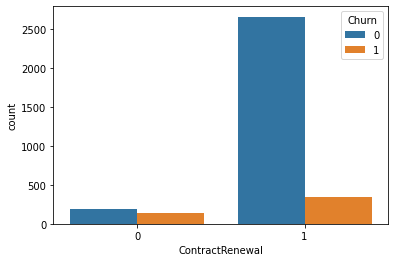

In [108]:
sns.countplot(x=df['ContractRenewal'],hue=df['Churn'],data=df)

<AxesSubplot:xlabel='CustServCalls', ylabel='count'>

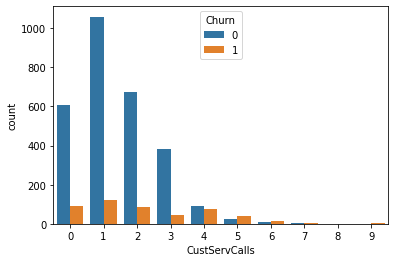

In [109]:
sns.countplot(x=df['CustServCalls'],hue=df['Churn'],data=df)

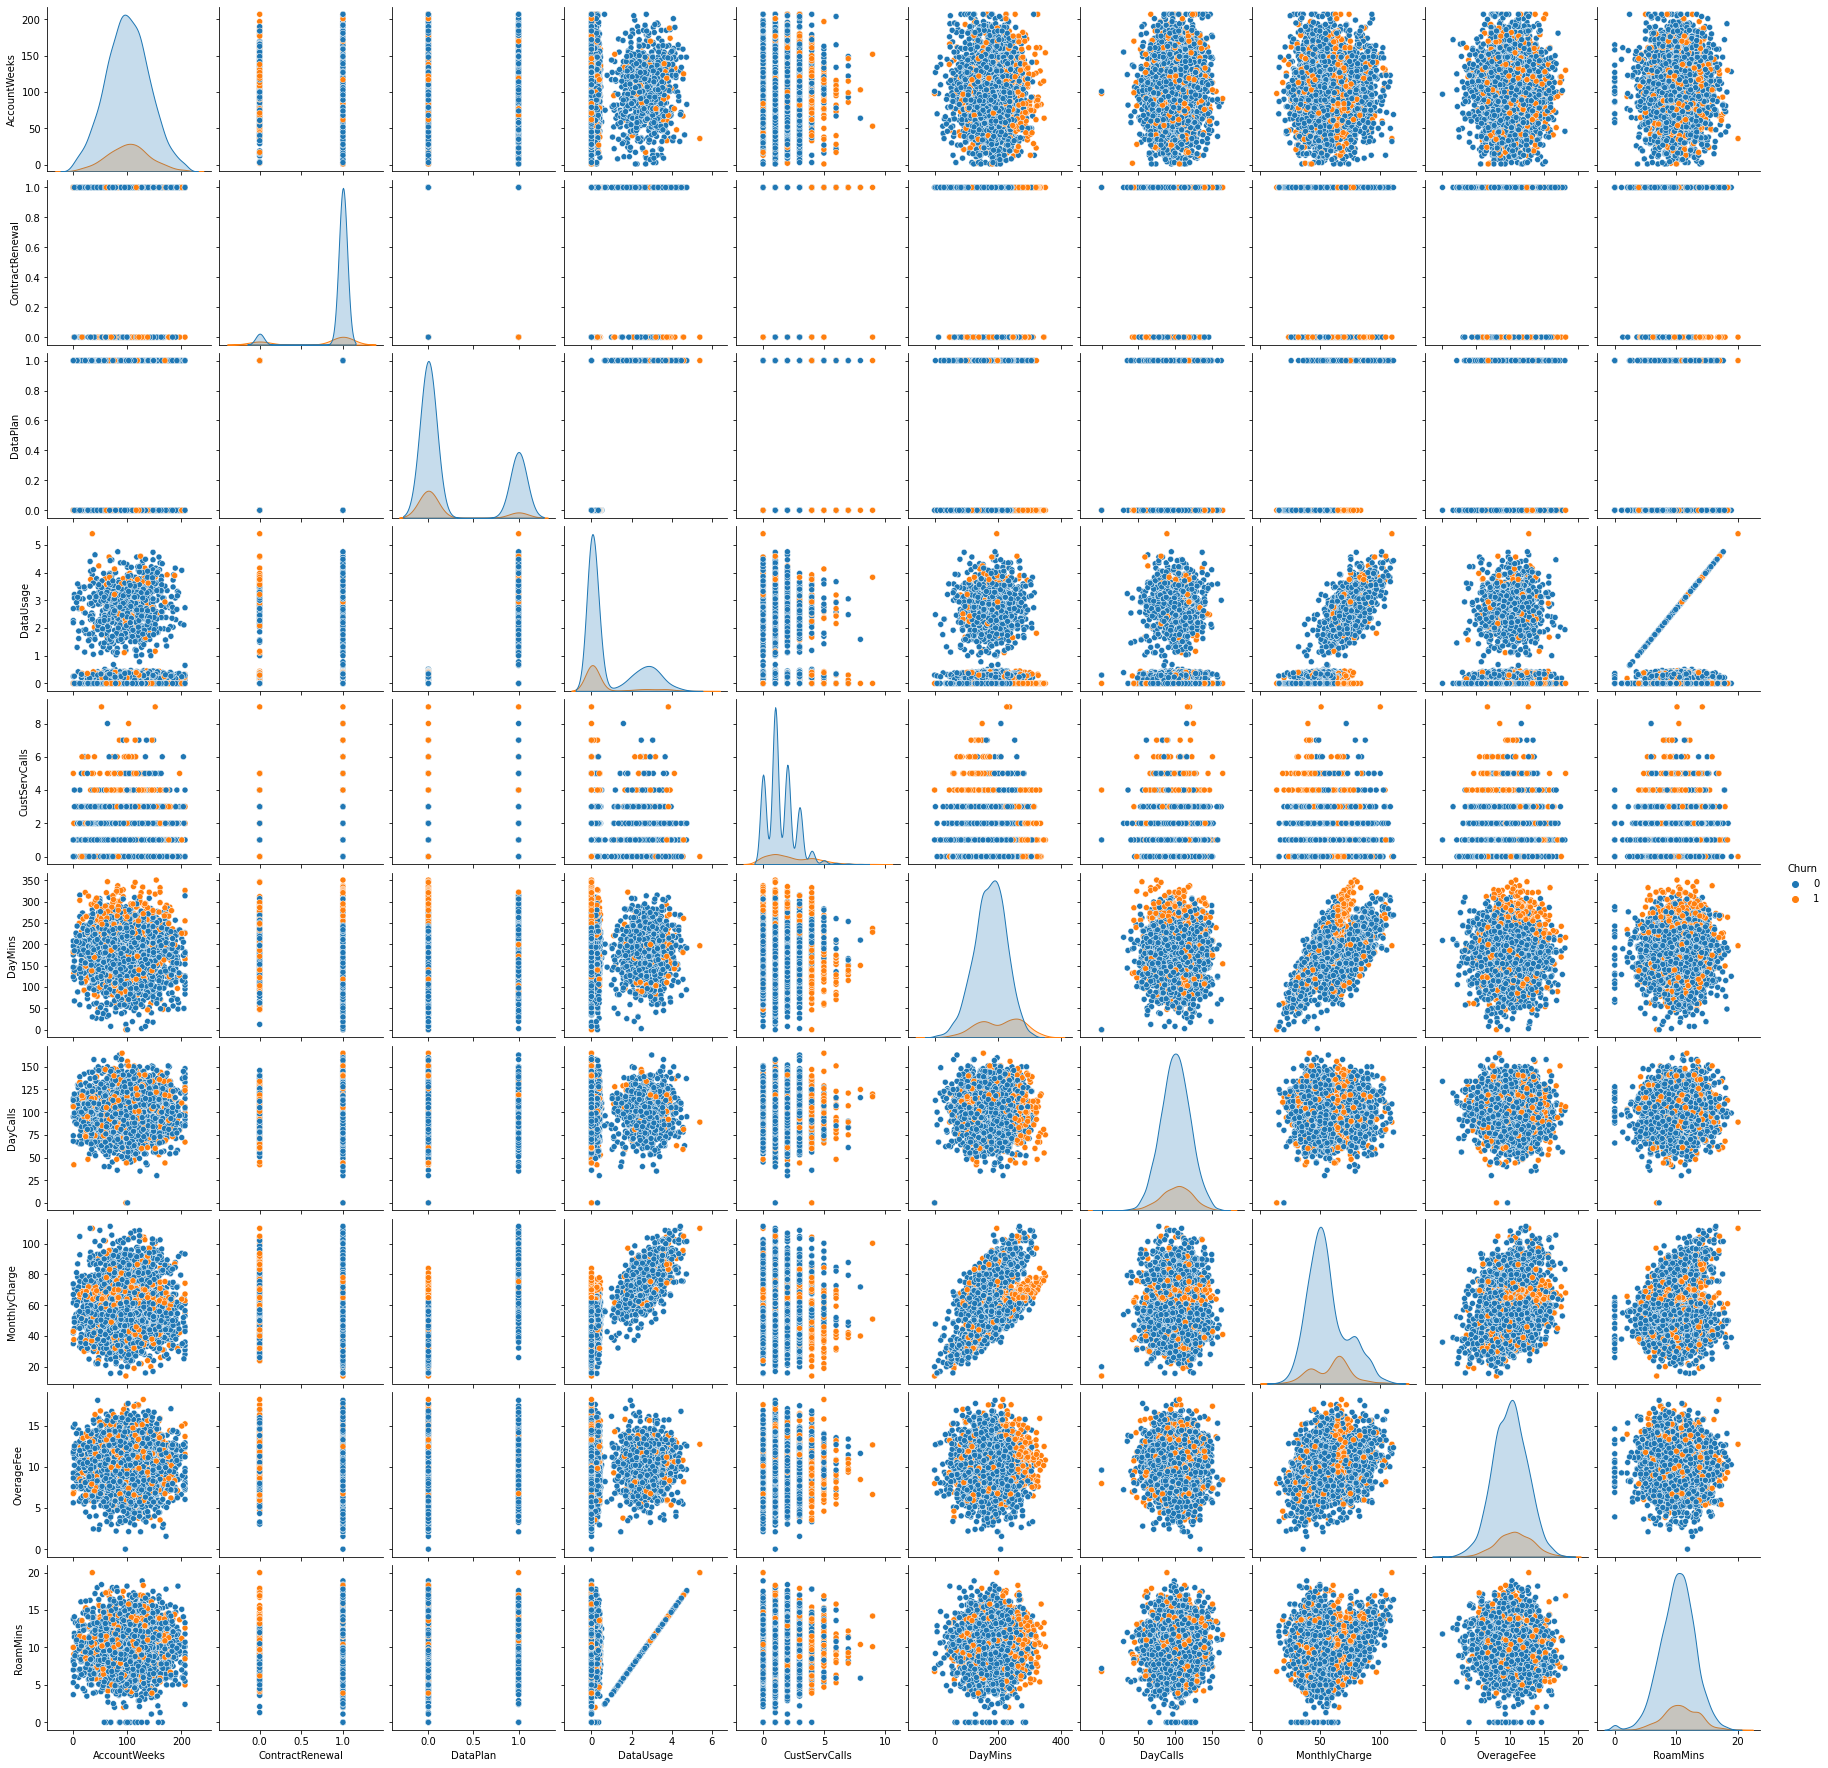

In [110]:
sns.pairplot(df,hue='Churn')

<AxesSubplot:xlabel='AccountWeeks', ylabel='DataUsage'>

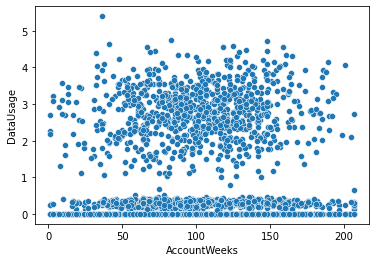

In [111]:
sns.scatterplot( x='AccountWeeks',y='DataUsage',data=df)

<AxesSubplot:xlabel='AccountWeeks', ylabel='DayCalls'>

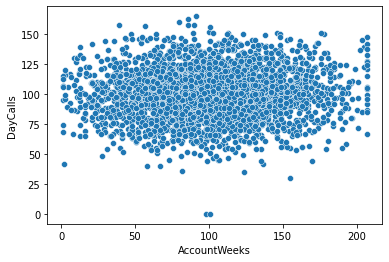

In [170]:
sns.scatterplot( x='AccountWeeks',y='DayCalls',data=df)

<AxesSubplot:xlabel='AccountWeeks', ylabel='MonthlyCharge'>

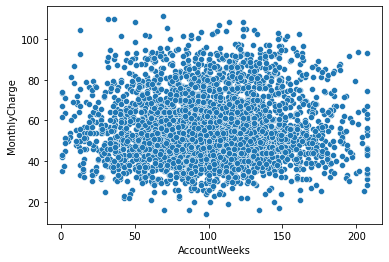

In [172]:
sns.scatterplot( x='AccountWeeks',y='MonthlyCharge',data=df)

In [169]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


### decision trees doesn't need scaling
they are not sensitive to outliers

A rule is a conditional statement that can easily be understood by humans and easily used within a database to identify a set of records.

they consists of root node,leafnodes,and internal nodes


In [112]:
df

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
3328,0,192,1,1,2.67,2,156.2,77,71.7,10.78,9.9
3329,0,68,1,0,0.34,3,231.1,57,56.4,7.67,9.6
3330,0,28,1,0,0.00,2,180.8,109,56.0,14.44,14.1
3331,0,184,0,0,0.00,2,213.8,105,50.0,7.98,5.0


### Correlation Matrix

<Figure size 936x1728 with 0 Axes>

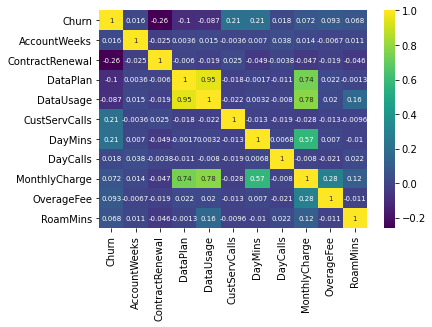

<Figure size 936x1728 with 0 Axes>

In [113]:
sns.heatmap(df.corr(),cmap='viridis',annot=True,annot_kws={"size":7})
plt.figure(figsize=(13,24))

In [114]:
df.corr()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
Churn,1.000000,0.016298,-0.259852,-0.102148,-0.087195,0.208750,0.205151,0.018459,0.072313,0.092812,0.068239
AccountWeeks,0.016298,1.000000,-0.024892,0.003561,0.015155,-0.003586,0.007045,0.037859,0.013656,-0.006675,0.010687
ContractRenewal,-0.259852,-0.024892,1.000000,-0.006006,-0.019223,0.024522,-0.049396,-0.003755,-0.047291,-0.019105,-0.045871
DataPlan,-0.102148,0.003561,-0.006006,1.000000,0.945982,-0.017824,-0.001684,-0.011086,0.737490,0.021526,-0.001318
DataUsage,-0.087195,0.015155,-0.019223,0.945982,1.000000,-0.021723,0.003176,-0.007962,0.781660,0.019637,0.162746
CustServCalls,0.208750,-0.003586,0.024522,-0.017824,-0.021723,1.000000,-0.013423,-0.018942,-0.028017,-0.012964,-0.009640
DayMins,0.205151,0.007045,-0.049396,-0.001684,0.003176,-0.013423,1.000000,0.006750,0.567968,0.007038,-0.010155
DayCalls,0.018459,0.037859,-0.003755,-0.011086,-0.007962,-0.018942,0.006750,1.000000,-0.007963,-0.021449,0.021565
MonthlyCharge,0.072313,0.013656,-0.047291,0.737490,0.781660,-0.028017,0.567968,-0.007963,1.000000,0.281766,0.117433
OverageFee,0.092812,-0.006675,-0.019105,0.021526,0.019637,-0.012964,0.007038,-0.021449,0.281766,1.000000,-0.011023


### we seethat montly charge and dataplan are positively correlated

In [115]:
### and montly charge data usage are positively correlated
###data plan and data usage are highly correlated

### ### we have no categorical variables dont need encoding

### Model testing and Evaluation

In [116]:
from sklearn.model_selection import train_test_split
x=df.drop('Churn',axis=1)
y=df['Churn']

In [117]:
x_train,x_test,ytrain,ytest=train_test_split(x,y,test_size=0.25)

In [1]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [ ]:
model.

In [119]:
model.fit(x_train,ytrain)

LogisticRegression()

In [120]:
model.score(x_test,ytest)

0.8393285371702638

In [121]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix,roc_auc_score,plot_roc_curve,f1_score,roc_auc_score,roc_curve


In [122]:
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

In [123]:
a=classification_report(ytrain,y_pred_train)
print(a)

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2144
           1       0.49      0.20      0.29       355

    accuracy                           0.86      2499
   macro avg       0.68      0.58      0.60      2499
weighted avg       0.82      0.86      0.83      2499



#### classification report for both training and test data

In [124]:
def compare_model_train_test(model):
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)
    train_accuracy = accuracy_score(ytrain, y_train_pred)
    test_accuracy = accuracy_score(ytest, y_test_pred)
    train_clf_report = classification_report(ytrain, y_train_pred)
    test_clf_report = classification_report(ytest, y_test_pred)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
         'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [125]:
compare_model_train_test(model)

Training accuracy is : 0.8563425370148059 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      2144
           1       0.49      0.20      0.29       355

    accuracy                           0.86      2499
   macro avg       0.68      0.58      0.60      2499
weighted avg       0.82      0.86      0.83      2499
 
 Testing accuracy is : 0.84 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       706
           1       0.43      0.14      0.21       128

    accuracy                           0.84       834
   macro avg       0.64      0.55      0.56       834
weighted avg       0.79      0.84      0.80       834
 



### train(cm)

<AxesSubplot:>

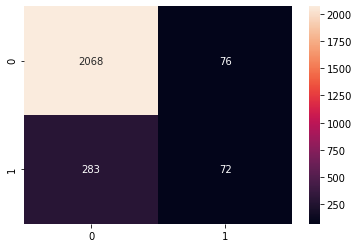

In [126]:
cm_train=confusion_matrix(ytrain,y_pred_train)
sns.heatmap(cm_train,annot=True, fmt='g')

### test

<AxesSubplot:>

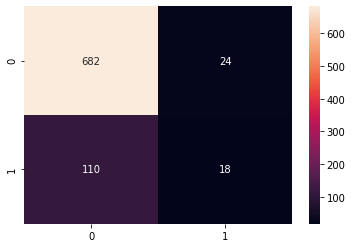

In [127]:
cm_test=confusion_matrix(ytest,y_pred_test)
sns.heatmap(cm_test,annot=True, fmt='g')

In [128]:
y_pred_rcv=model.predict_proba(x_test)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(ytest,y_pred_rcv_pos)

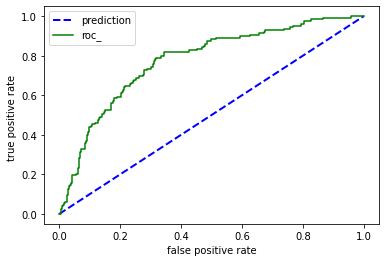

In [129]:
fpr,tpr,thresholds =roc_curve(ytest,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [130]:
roc_auc_score(ytest,y_pred_test)

0.5533153328611898

### we see there is class imbalance here ....now we balance the data using random over sampler

In [131]:
from imblearn import over_sampling,under_sampling
from imblearn.over_sampling import RandomOverSampler

In [132]:
ros=RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(x,y)
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=42)

In [133]:
y_test_ros.value_counts()

0    882
1    828
Name: Churn, dtype: int64

In [134]:
y_train_ros.value_counts()

1    2022
0    1968
Name: Churn, dtype: int64

In [135]:
model_ros=model.fit(X_train_ros,y_train_ros)

In [136]:
model_ros.score(X_test_ros,y_test_ros)

0.752046783625731

In [137]:
y_pred_ros_test=model_ros.predict(X_test_ros)
y_pred_ros_train=model_ros.predict(X_train_ros)

### test

<AxesSubplot:>

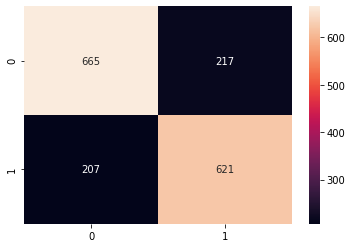

In [138]:
cm_ros=confusion_matrix(y_test_ros,y_pred_ros_test)
sns.heatmap(cm_ros,annot=True,fmt='g')

### train

<AxesSubplot:>

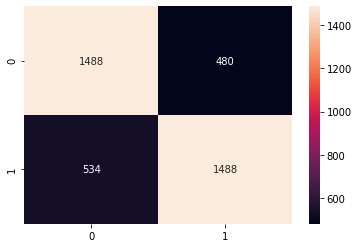

In [168]:
cm_ro=confusion_matrix(y_train_ros,y_pred_ros_train)
sns.heatmap(cm_ro,annot=True,fmt='g')

In [140]:
def compare_model_train_test(model):
    y_train_pred = model_ros.predict(X_train_ros)
    y_test_pred = model_ros.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_pred_ros_train)
    test_accuracy = accuracy_score(y_test_ros, y_pred_ros_test)
    train_clf_report = classification_report(y_train_ros, y_pred_ros_train)
    test_clf_report = classification_report(y_test_ros, y_pred_ros_test)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
                 'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [141]:
compare_model_train_test(model)

Training accuracy is : 0.7458646616541353 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75      1968
           1       0.76      0.74      0.75      2022

    accuracy                           0.75      3990
   macro avg       0.75      0.75      0.75      3990
weighted avg       0.75      0.75      0.75      3990
 
 Testing accuracy is : 0.75 
               precision    recall  f1-score   support

           0       0.76      0.75      0.76       882
           1       0.74      0.75      0.75       828

    accuracy                           0.75      1710
   macro avg       0.75      0.75      0.75      1710
weighted avg       0.75      0.75      0.75      1710
 



In [142]:
y_pred_rcv=model_ros.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

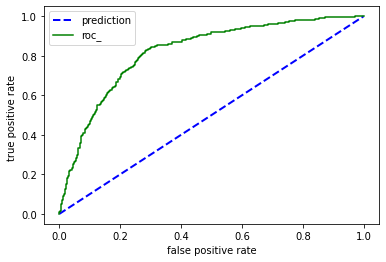

In [143]:
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [144]:
roc_auc_score(y_test_ros,y_pred_ros_test)

0.751984126984127

### we seethat it wiil be increased after resampling........|

# DECISION TREES CLASSIFICATIION

In [145]:
from sklearn.tree import DecisionTreeClassifier
d_c=DecisionTreeClassifier( criterion='gini',random_state=42)

In [146]:
model_dc=d_c.fit(x_train,ytrain)


In [147]:
model_dc.score(x_test,ytest)

0.8896882494004796

In [148]:
y_pred_dc_test=model_dc.predict(x_test)
y_pred_dc_train=model_dc.predict(x_train)

In [149]:
def compare_model_train_test(model):
    y_train_pred = model_dc.predict(x_train)
    y_test_pred = model_dc.predict(x_test)
    train_accuracy = accuracy_score(ytrain, y_pred_dc_train)
    test_accuracy = accuracy_score(ytest, y_pred_dc_test)
    train_clf_report = classification_report(ytrain, y_pred_dc_train)
    test_clf_report = classification_report(ytest, y_pred_dc_test)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
                 'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [150]:
compare_model_train_test(model)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2144
           1       1.00      1.00      1.00       355

    accuracy                           1.00      2499
   macro avg       1.00      1.00      1.00      2499
weighted avg       1.00      1.00      1.00      2499
 
 Testing accuracy is : 0.89 
               precision    recall  f1-score   support

           0       0.94      0.93      0.93       706
           1       0.64      0.65      0.64       128

    accuracy                           0.89       834
   macro avg       0.79      0.79      0.79       834
weighted avg       0.89      0.89      0.89       834
 



### test

<AxesSubplot:>

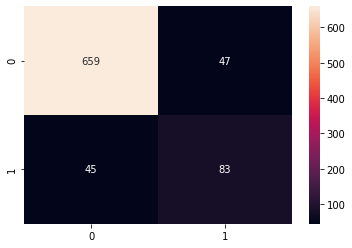

In [151]:
cm_dc=confusion_matrix(ytest,y_pred_dc_test)
sns.heatmap(cm_dc,annot=True,fmt='g')

### train 

<AxesSubplot:>

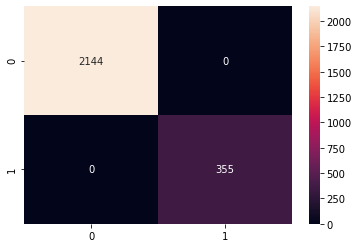

In [152]:
cm_dc_train=confusion_matrix(ytrain,y_pred_dc_train)
sns.heatmap(cm_dc_train,annot=True,fmt='g')

In [153]:
y_pred_rcv=model_ros.predict_proba(x_test)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(ytest,y_pred_rcv_pos)

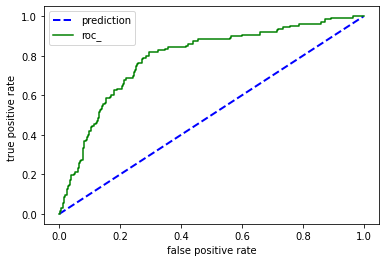

In [154]:
fpr,tpr,thresholds =roc_curve(ytest,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [155]:
roc_auc_score(ytest,y_pred_dc_test)

0.79093263101983

### this is on normal data

### lets see what happens if we apply on the resampling data

In [156]:
X_train_ros,X_test_ros,y_train_ros,y_test_ros=train_test_split(x_ros,y_ros,test_size=0.3,random_state=42)

In [157]:
model_dc_ros=d_c.fit(X_train_ros,y_train_ros)

In [158]:
model_dc_ros.score(X_test_ros,y_test_ros)

0.9590643274853801

In [159]:
y_pred_dc_test_ros=model_dc_ros.predict(X_test_ros)
y_pred_dc_train_ros=model_dc_ros.predict(X_train_ros)

In [160]:
def compare_model_train_test(model):
    y_train_pred = model_dc_ros.predict(X_train_ros)
    y_test_pred = model_dc_ros.predict(X_test_ros)
    train_accuracy = accuracy_score(y_train_ros, y_pred_dc_train_ros)
    test_accuracy = accuracy_score(y_test_ros, y_pred_dc_test_ros)
    train_clf_report = classification_report(y_train_ros, y_pred_dc_train_ros)
    test_clf_report = classification_report(y_test_ros, y_pred_dc_test_ros)
    print('Training accuracy is :', train_accuracy, '\n', train_clf_report, '\n',
                 'Testing accuracy is :', round(test_accuracy,2), '\n', test_clf_report, '\n' )

In [161]:
compare_model_train_test(model)

Training accuracy is : 1.0 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1968
           1       1.00      1.00      1.00      2022

    accuracy                           1.00      3990
   macro avg       1.00      1.00      1.00      3990
weighted avg       1.00      1.00      1.00      3990
 
 Testing accuracy is : 0.96 
               precision    recall  f1-score   support

           0       1.00      0.92      0.96       882
           1       0.92      1.00      0.96       828

    accuracy                           0.96      1710
   macro avg       0.96      0.96      0.96      1710
weighted avg       0.96      0.96      0.96      1710
 



<AxesSubplot:>

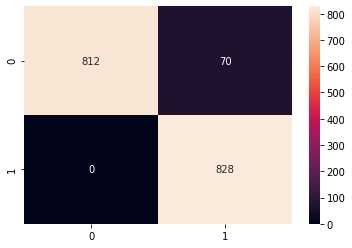

In [162]:
cm_dc=confusion_matrix(y_test_ros,y_pred_dc_test_ros)
sns.heatmap(cm_dc,annot=True,fmt='g')

<AxesSubplot:>

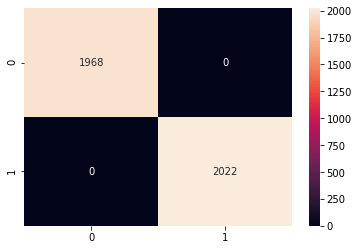

In [163]:
cm_dc=confusion_matrix(y_train_ros,y_pred_dc_train_ros)
sns.heatmap(cm_dc,annot=True,fmt='g')

In [164]:
y_pred_rcv=model_ros.predict_proba(X_test_ros)
y_pred_rcv_pos=y_pred_rcv[:,1]##taking positive probabilities
y_pred_rcv_pos
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)

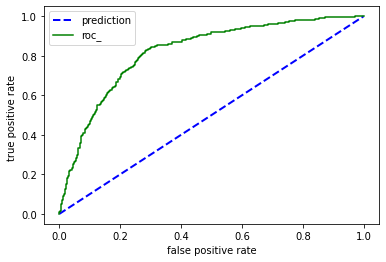

In [165]:
fpr,tpr,thresholds =roc_curve(y_test_ros,y_pred_rcv_pos)
plt.plot([0,1],[0,1],color='blue',label='prediction',linewidth=2,linestyle='--')
plt.xlabel('false positive rate')
plt.plot(fpr,tpr ,color='green',label='roc_')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate ')
plt.legend()
plt.show()

In [166]:
roc_auc_score(y_test_ros,y_pred_dc_test_ros)

0.9603174603174603

### take best model from these guys....